# **Linking to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#**Importing Libraries and Reading The Feature-Selected Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
hd=pd.read_csv('/content/featureSelection_heart.csv')

# **Data Inspection**

In [ ]:
hd.head()

,age,cp,trestbps,chol,thalach,oldpeak,ca,thal,target
0,0.479167,0.0,0.292453,0.303887,0.740458,0.227273,0.50,1.0,0
1,0.500000,0.0,0.433962,0.272085,0.641221,0.704545,0.00,1.0,0
2,0.854167,0.0,0.481132,0.169611,0.412214,0.590909,0.00,1.0,0
3,0.666667,0.0,0.509434,0.272085,0.687023,0.000000,0.25,1.0,0
4,0.687500,0.0,0.415094,0.593640,0.267176,0.431818,0.75,0.5,0


In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    float64
 1   cp        298 non-null    float64
 2   trestbps  298 non-null    float64
 3   chol      298 non-null    float64
 4   thalach   298 non-null    float64
 5   oldpeak   298 non-null    float64
 6   ca        298 non-null    float64
 7   thal      298 non-null    float64
 8   target    298 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 21.1 KB


In [ ]:
hd.describe()

,age,cp,trestbps,chol,thalach,oldpeak,ca,thal,target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.527405,0.321029,0.353837,0.421337,0.600415,0.229408,0.178691,0.661074,0.543624
std,0.188485,0.344153,0.165700,0.167603,0.175074,0.249514,0.250738,0.291683,0.498931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380208,0.000000,0.245283,0.300353,0.475191,0.000000,0.000000,0.500000,0.000000
50%,0.541667,0.333333,0.339623,0.404594,0.622137,0.170455,0.000000,0.500000,1.000000
75%,0.666667,0.666667,0.433962,0.522968,0.725191,0.363636,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Splitting The Data**

In [ ]:
X = hd.drop("target", axis=1)
y = hd["target"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (298, 8)
Shape of y: (298,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# **Logistec Regression Model**

In [ ]:
logreg=LogisticRegression(random_state=0)

In [ ]:
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Logistic Regression Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred))

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(logreg, X, y, cv=5, scoring=scoring, return_estimator=True)

print("Cross-Validation Results:")
print("Mean Accuracy:", np.mean(cv_results['test_accuracy']))
print("Mean Precision:", np.mean(cv_results['test_precision']))
print("Mean Recall:", np.mean(cv_results['test_recall']))
print("Mean F1:", np.mean(cv_results['test_f1']))

Logistic Regression Results:

Accuracy: 0.9166666666666666

Confusion Matrix (Test):
 [[26  1]
 [ 4 29]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.97      0.88      0.92        33

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

Cross-Validation Results:
Mean Accuracy: 0.8254237288135593
Mean Precision: 0.8060641000586279
Mean Recall: 0.9005681818181819
Mean F1: 0.8492708145173374


AUC Score: 0.9382716049382716 



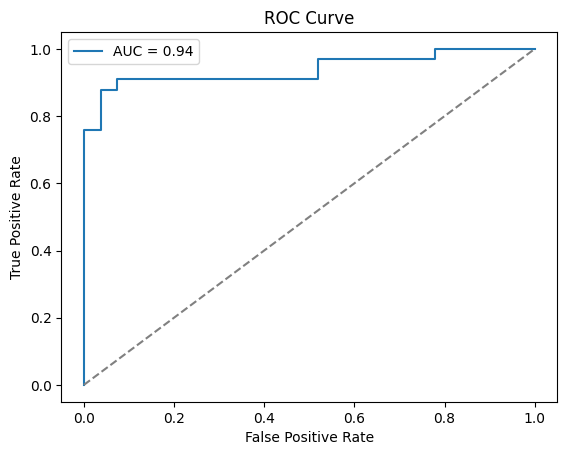

In [ ]:
y_prob = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score, "\n")

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Decisoin Tree Classifier Model**

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print("Decision Tree Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(dtc, X, y, cv=5, scoring=scoring, return_estimator=True)

print("Cross-Validation Results:")
print("Mean Accuracy:", np.mean(cv_results['test_accuracy']))
print("Mean Precision:", np.mean(cv_results['test_precision']))
print("Mean Recall:", np.mean(cv_results['test_recall']))
print("Mean F1:", np.mean(cv_results['test_f1']))

Decision Tree Results:

Accuracy: 0.7833333333333333
Confusion Matrix:
 [[23  4]
 [ 9 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.86      0.73      0.79        33

    accuracy                           0.78        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60

Cross-Validation Results:
Mean Accuracy: 0.7416949152542373
Mean Precision: 0.7672964669738863
Mean Recall: 0.7534090909090909
Mean F1: 0.7595811266249399


AUC Score: 0.7895622895622896 



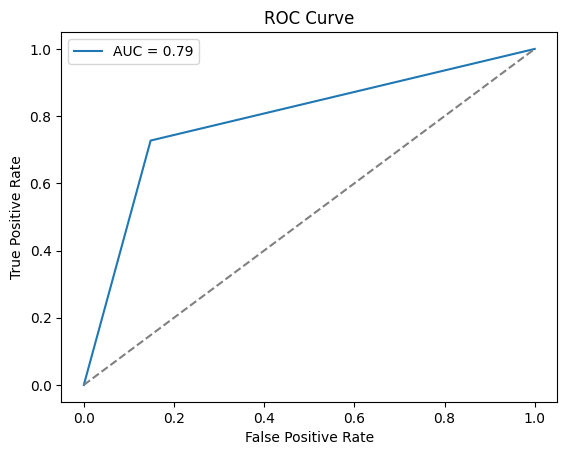

In [ ]:
y_prob = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score, "\n")

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#**Random Forest Classifier Model**



In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("Random Forest Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rfc, X, y, cv=5, scoring=scoring, return_estimator=True)

print("Cross-Validation Results:")
print("Mean Accuracy:", np.mean(cv_results['test_accuracy']))
print("Mean Precision:", np.mean(cv_results['test_precision']))
print("Mean Recall:", np.mean(cv_results['test_recall']))
print("Mean F1:", np.mean(cv_results['test_f1']))

Random Forest Results:

Accuracy: 0.85

Confusion Matrix:
 [[23  4]
 [ 5 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.86        33

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Cross-Validation Results:
Mean Accuracy: 0.791864406779661
Mean Precision: 0.7922219527312906
Mean Recall: 0.8393939393939395
Mean F1: 0.8139125468350048


AUC Score: 0.9068462401795736 



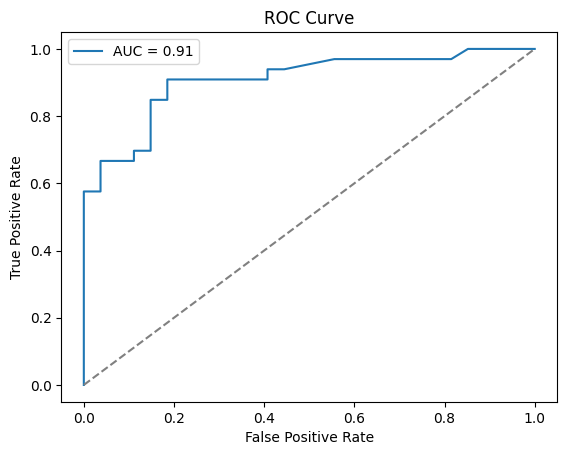

In [ ]:
y_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score, "\n")

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#**Support Vector Classifier Model**

In [ ]:
svm = SVC(probability=True, random_state=42)

In [ ]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(svm, X, y, cv=5, scoring=scoring, return_estimator=True)

print("Cross-Validation Results:")
print("Mean Accuracy:", np.mean(cv_results['test_accuracy']))
print("Mean Precision:", np.mean(cv_results['test_precision']))
print("Mean Recall:", np.mean(cv_results['test_recall']))
print("Mean F1:", np.mean(cv_results['test_f1']))

SVM Results:

Accuracy: 0.8666666666666667
Confusion Matrix:
 [[24  3]
 [ 5 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.90      0.85      0.88        33

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

Cross-Validation Results:
Mean Accuracy: 0.8286440677966102
Mean Precision: 0.8057836106616595
Mean Recall: 0.9070075757575757
Mean F1: 0.8523188615260227


AUC Score: 0.9191919191919192 



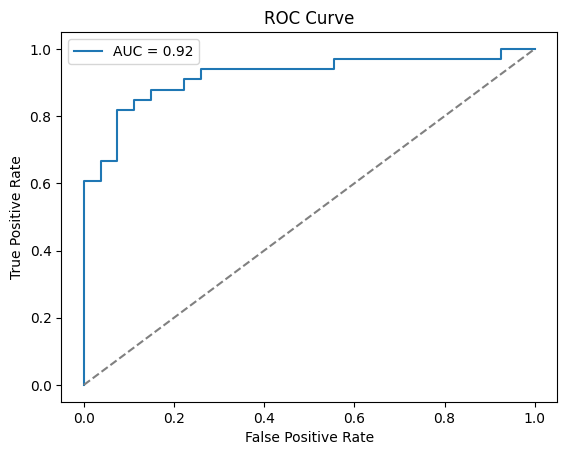

In [ ]:
y_prob = svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score, "\n")

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **Combined ROC Curves & AUC Scores**

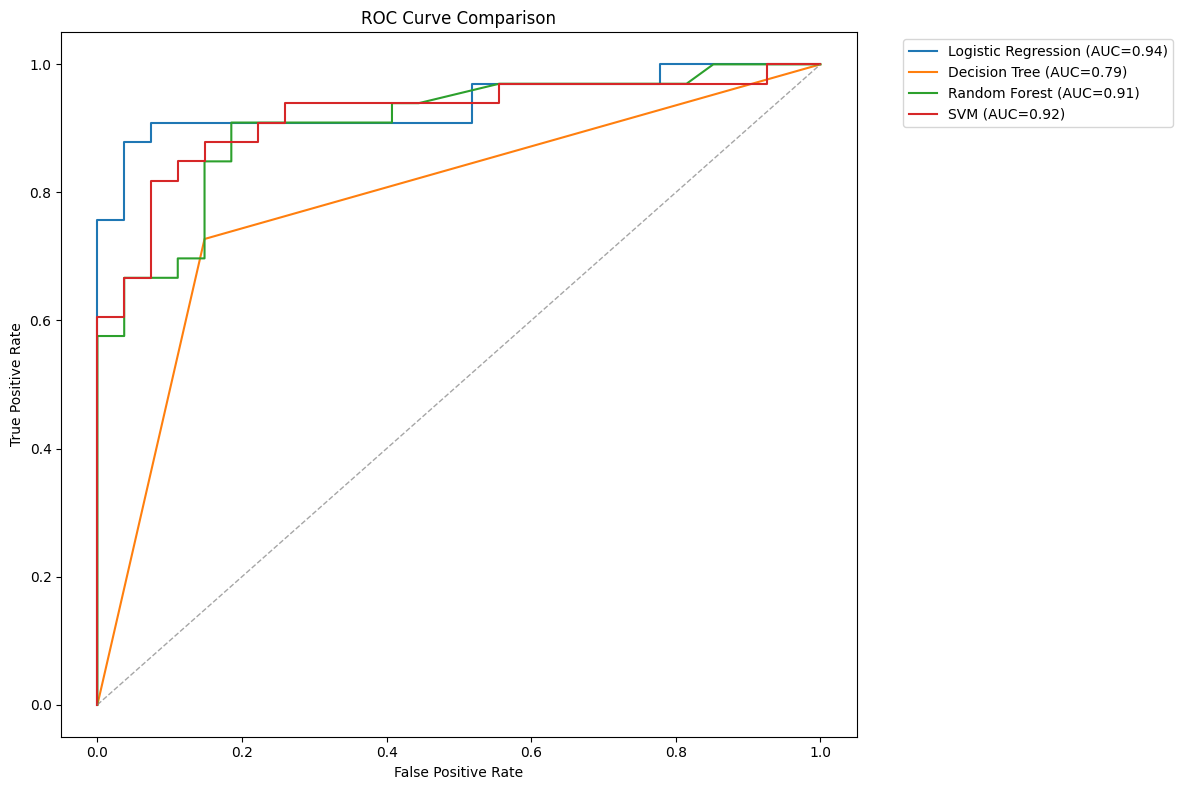

In [ ]:
fitted_models = {
    "Logistic Regression": logreg,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "SVM": svm,
}

plt.figure(figsize=(12, 8))

for name, model in fitted_models.items():
    # choose scaled or raw depending on model
    if name in ["Logistic Regression", "SVM"]:
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.predict_proba(X_test)[:, 1]

    # compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # plot each model’s ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

# baseline (random classifier)
plt.plot([0, 1],[0, 1], color='gray', linestyle="--", linewidth=1, alpha=0.7)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()